In [1]:
import utilsNb as utils
from transformers import AutoTokenizer
import pandas as pd

# reload
%load_ext autoreload
%autoreload 2

In [2]:
ID_TO_LABEL = {
    0: 'non-esg',
    1: 'environnemental',
    2: 'social',
    3: 'gouvernance'
}

LABEL_TO_ID = {v: k for k, v in ID_TO_LABEL.items()}

test_df = pd.read_csv('../data/final_test_esg.csv', encoding='utf-8', sep=',')
test_df['label'] = test_df['esg_category'].apply(lambda x: LABEL_TO_ID[x])

## PyTorch Lightning (PL) model 1

In [3]:
tokenizer = AutoTokenizer.from_pretrained('camembert-base')
pl_model_config_path ='../baobab/models/pl_model.pt/config.json'
pl_model_path ='../baobab/models/pl_model.pt/pytorch_model.bin'

In [4]:
model = utils.load_model(pl_model_path,pl_model_config_path, eval_mode=True)

In [5]:
f1, acc = utils.test_model(model, tokenizer, test_df=test_df)

100%|██████████| 65/65 [00:05<00:00, 12.58it/s]


Accuracy: 0.6923
F1 Score: 0.5752
Index(['text', 'esg_category', 'prediction', 'proba'], dtype='object')


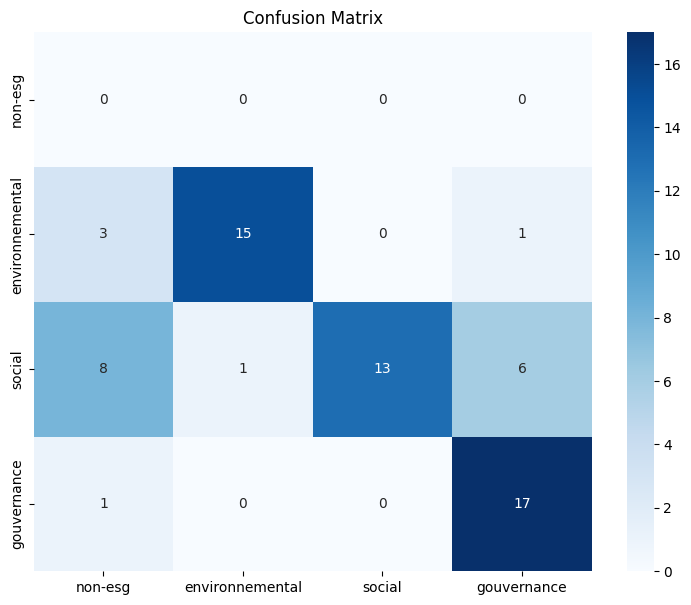

In [6]:

label_names = list(ID_TO_LABEL.values())
true_labels = test_df['esg_category']
predicted_labels = test_df['prediction']

utils.plot_confusion_matrix(true_labels, predicted_labels, label_names)


## PL model 2:
> Added mini-batching, learning rate scheduler and weight decay

In [7]:
tokenizer = AutoTokenizer.from_pretrained('camembert-base')
minibatch_model_config_path ='../baobab/models/minibatch_model.pt/config.json'
minibatch_model_path ='../baobab/models/minibatch_model.pt/pytorch_model.bin'

In [8]:
model2 = utils.load_model(minibatch_model_path,minibatch_model_config_path, eval_mode=True)
f1, acc = utils.test_model(model2, tokenizer, test_df=test_df)

100%|██████████| 65/65 [00:05<00:00, 12.33it/s]

Accuracy: 0.7077
F1 Score: 0.5588
Index(['text', 'esg_category', 'prediction', 'proba'], dtype='object')


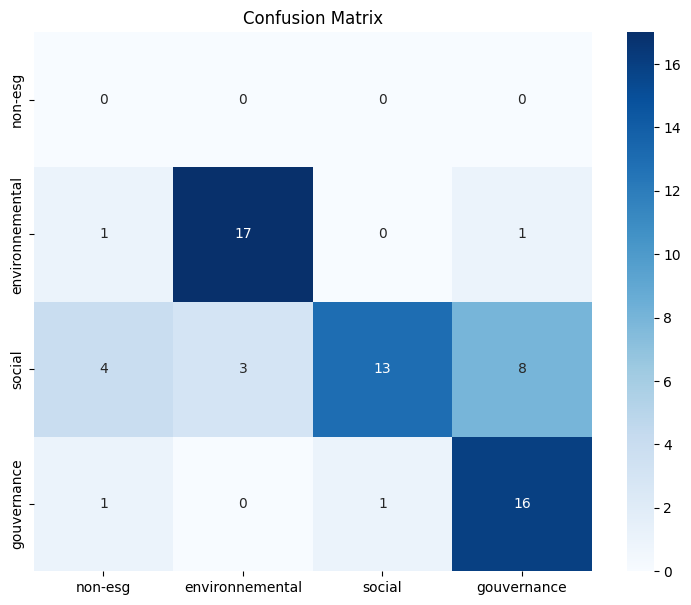

In [9]:
label_names = list(ID_TO_LABEL.values())
true_labels = test_df['esg_category']
predicted_labels = test_df['prediction']

utils.plot_confusion_matrix(true_labels, predicted_labels, label_names)

### Replacing NON-ESG with the second best class

In [13]:
test_df2 = test_df.copy()
test_df2.head()

,text,esg_category,prediction,proba
0,"(Émissions carbone, empreinte carbone, finance...",environnemental,environnemental,"{'non-esg': 0.010775411501526833, 'environneme..."
1,La vague de chaleur a poussé le Département de...,environnemental,environnemental,"{'non-esg': 0.0964982733130455, 'environnement..."
2,La météo moins chaude des derniers jours a aid...,environnemental,environnemental,"{'non-esg': 0.34598419070243835, 'environnemen..."
3,Les précipitations importantes liées à la temp...,environnemental,environnemental,"{'non-esg': 0.19773751497268677, 'environnemen..."
4,La météo dans tous ses états racontée par troi...,environnemental,environnemental,"{'non-esg': 0.04928851127624512, 'environnemen..."
